In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_data = pd.read_csv('../dataset/Electric_Production.csv')

In [3]:
raw_data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [4]:
df = raw_data.copy()

In [5]:
df.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

In [6]:
pd.to_datetime(df['DATE']).dt.month.iloc[:13]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12     1
Name: DATE, dtype: int64

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [8]:
df.sort_values(by='DATE', inplace=True)

In [9]:
df['DATE'].describe(datetime_is_numeric=True)

count                              397
mean     2001-07-01 13:25:14.357682560
min                1985-01-01 00:00:00
25%                1993-04-01 00:00:00
50%                2001-07-01 00:00:00
75%                2009-10-01 00:00:00
max                2018-01-01 00:00:00
Name: DATE, dtype: object

In [10]:
df.isna().sum()

DATE          0
IPG2211A2N    0
dtype: int64

In [11]:
df.set_index('DATE', inplace=True)

In [12]:
df = df.rename(columns={'IPG2211A2N': 'WATT'})

In [13]:
df.head(20)

,WATT
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


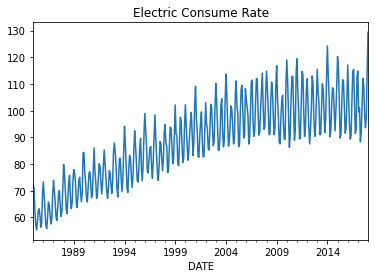

In [14]:
df['WATT'].plot()
plt.title('Electric Consume Rate')
plt.show()

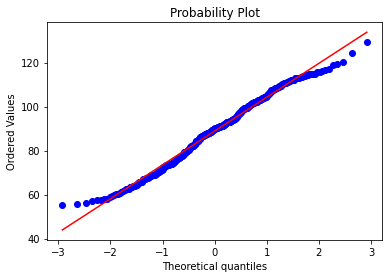

In [15]:
import scipy
import pylab

scipy.stats.probplot(df['WATT'], plot=pylab)
pylab.show()

In [16]:
df.shape

(397, 1)

In [17]:
size = int(len(df) * 0.8)

df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [18]:
from statsmodels.tsa.stattools import adfuller

adfuller(df_train['WATT'])

(-1.7386950117875053,
 0.41129393445577905,
 15,
 301,
 {'1%': -3.452263435801039,
  '5%': -2.871190526189069,
  '10%': -2.571911967527952},
 1401.7831544268493)

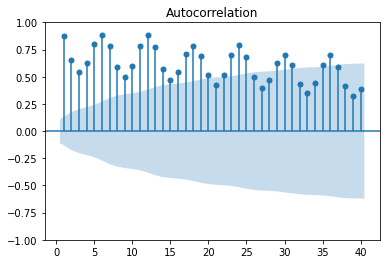

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_train['WATT'], lags=40, zero=False)
plt.show()

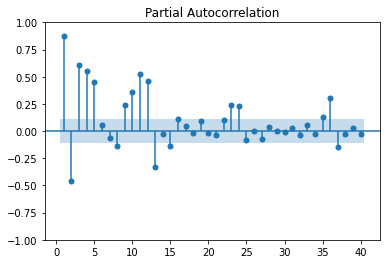

In [20]:
plot_pacf(df_train['WATT'], lags=40, zero=False, method=('ols'))
plt.show()

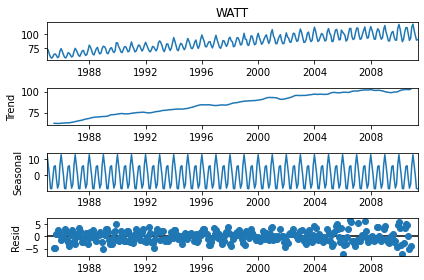

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

s_dec_additive = seasonal_decompose(df_train['WATT'], model='additive')
s_dec_additive.plot()
plt.show()

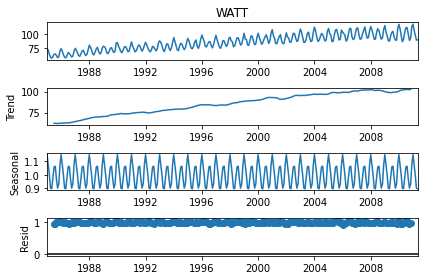

In [22]:
s_dec_multiplicative = seasonal_decompose(df_train['WATT'], model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = scipy.stats.distributions.chi2.sf(LR, DF).round(3)
    return p

In [26]:
ar_model_1 = ARIMA(df_train['WATT'], order=(1,0,0))
res_model_1 = ar_model_1.fit()
res_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1067.948
Date:                Fri, 20 Jan 2023   AIC                           2141.897
Time:                        04:17:57   BIC                           2153.173
Sample:                    01-01-1985   HQIC                          2146.401
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.1737      3.554     23.964      0.000      78.208      92.140
ar.L1          0.8748      0.031     28.257      0.000       0.814       0.935
sigma2        49.1725      4.964      9.907      0.000      39.444      58.901
===================================================================================
Ljung-Box (L1) (Q):                  52.53   Jarque-Bera (JB):                17.88
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.46   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
ar_model_2 = ARIMA(df_train['WATT'], order=(2,0,0))
res_model_2 = ar_model_2.fit()
res_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1030.041
Date:                Fri, 20 Jan 2023   AIC                           2068.081
Time:                        04:17:57   BIC                           2083.117
Sample:                    01-01-1985   HQIC                          2074.087
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3455      2.119     40.267      0.000      81.191      89.500
ar.L1          1.2787      0.062     20.754      0.000       1.158       1.399
ar.L2         -0.4604      0.066     -6.996      0.000      -0.589      -0.331
sigma2        38.6555      3.166     12.210      0.000      32.450      44.861
===================================================================================
Ljung-Box (L1) (Q):                  24.95   Jarque-Bera (JB):                10.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.18   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
ar_model_3 = ARIMA(df_train['WATT'], order=(3,0,0))
res_model_3 = ar_model_3.fit()
res_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -957.954
Date:                Fri, 20 Jan 2023   AIC                           1925.907
Time:                        04:17:58   BIC                           1944.702
Sample:                    01-01-1985   HQIC                          1933.415
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0806      4.349     19.562      0.000      76.556      93.605
ar.L1          1.5614      0.045     34.416      0.000       1.472       1.650
ar.L2         -1.2389      0.063    -19.643      0.000      -1.363      -1.115
ar.L3          0.6075      0.039     15.547      0.000       0.531       0.684
sigma2        24.4225      1.669     14.636      0.000      21.152      27.693
===================================================================================
Ljung-Box (L1) (Q):                  34.64   Jarque-Bera (JB):                15.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.71   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
ar_model_4 = ARIMA(df_train['WATT'], order=(4,0,0))
res_model_4 = ar_model_4.fit()
res_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -901.361
Date:                Fri, 20 Jan 2023   AIC                           1814.723
Time:                        04:17:58   BIC                           1837.276
Sample:                    01-01-1985   HQIC                          1823.732
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.4467      7.564     11.164      0.000      69.621      99.273
ar.L1          1.2289      0.043     28.787      0.000       1.145       1.313
ar.L2         -0.5592      0.071     -7.901      0.000      -0.698      -0.420
ar.L3         -0.2488      0.069     -3.581      0.000      -0.385      -0.113
ar.L4          0.5501      0.040     13.634      0.000       0.471       0.629
sigma2        17.0075      1.251     13.598      0.000      14.556      19.459
===================================================================================
Ljung-Box (L1) (Q):                  17.84   Jarque-Bera (JB):                 3.71
Prob(Q):                              0.00   Prob(JB):                         0.16
Heteroskedasticity (H):               2.45   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
ar_model_5 = ARIMA(df_train['WATT'], order=(5,0,0))
res_model_5 = ar_model_5.fit()
res_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -867.502
Date:                Fri, 20 Jan 2023   AIC                           1749.004
Time:                        04:17:59   BIC                           1775.316
Sample:                    01-01-1985   HQIC                          1759.515
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3362     12.543      6.803      0.000      60.752     109.921
ar.L1          0.9827      0.046     21.148      0.000       0.892       1.074
ar.L2         -0.4491      0.071     -6.323      0.000      -0.588      -0.310
ar.L3          0.0011      0.084      0.014      0.989      -0.163       0.165
ar.L4          0.0048      0.078      0.062      0.951      -0.149       0.158
ar.L5          0.4478      0.054      8.250      0.000       0.341       0.554
sigma2        13.6753      0.999     13.687      0.000      11.717      15.634
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                13.84
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.79   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
ar_model_6 = ARIMA(df_train['WATT'], order=(6,0,0))
res_model_6 = ar_model_6.fit()
res_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                 ARIMA(6, 0, 0)   Log Likelihood                -867.087
Date:                Fri, 20 Jan 2023   AIC                           1750.173
Time:                        04:18:00   BIC                           1780.244
Sample:                    01-01-1985   HQIC                          1762.185
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3349     13.628      6.262      0.000      58.624     112.045
ar.L1          0.9594      0.055     17.527      0.000       0.852       1.067
ar.L2         -0.4498      0.072     -6.231      0.000      -0.591      -0.308
ar.L3          0.0017      0.085      0.020      0.984      -0.165       0.168
ar.L4          0.0276      0.086      0.320      0.749      -0.141       0.196
ar.L5          0.3973      0.088      4.535      0.000       0.226       0.569
ar.L6          0.0524      0.071      0.734      0.463      -0.087       0.192
sigma2        13.6366      1.023     13.328      0.000      11.631      15.642
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.90
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
ar_model_7 = ARIMA(df_train['WATT'], order=(7,0,0))
res_model_7 = ar_model_7.fit()
res_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -866.385
Date:                Fri, 20 Jan 2023   AIC                           1750.769
Time:                        04:18:01   BIC                           1784.599
Sample:                    01-01-1985   HQIC                          1764.283
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3365     12.824      6.654      0.000      60.201     110.472
ar.L1          0.9625      0.055     17.506      0.000       0.855       1.070
ar.L2         -0.4230      0.075     -5.608      0.000      -0.571      -0.275
ar.L3          0.0050      0.085      0.059      0.953      -0.162       0.172
ar.L4          0.0258      0.086      0.300      0.764      -0.143       0.195
ar.L5          0.3682      0.096      3.851      0.000       0.181       0.556
ar.L6          0.1170      0.099      1.177      0.239      -0.078       0.312
ar.L7         -0.0685      0.071     -0.968      0.333      -0.207       0.070
sigma2        13.5774      1.045     12.995      0.000      11.530      15.625
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                11.70
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
ar_model_8 = ARIMA(df_train['WATT'], order=(8,0,0))
res_model_8 = ar_model_8.fit()
res_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                 ARIMA(8, 0, 0)   Log Likelihood                -863.223
Date:                Fri, 20 Jan 2023   AIC                           1746.447
Time:                        04:18:02   BIC                           1784.036
Sample:                    01-01-1985   HQIC                          1761.462
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3390     11.046      7.726      0.000      63.690     106.988
ar.L1          0.9540      0.054     17.730      0.000       0.849       1.059
ar.L2         -0.4076      0.076     -5.366      0.000      -0.556      -0.259
ar.L3          0.0565      0.087      0.650      0.516      -0.114       0.227
ar.L4          0.0338      0.088      0.383      0.702      -0.139       0.207
ar.L5          0.3642      0.094      3.864      0.000       0.179       0.549
ar.L6          0.0582      0.103      0.564      0.572      -0.144       0.260
ar.L7          0.0691      0.103      0.674      0.500      -0.132       0.270
ar.L8         -0.1448      0.075     -1.926      0.054      -0.292       0.003
sigma2        13.3050      1.010     13.168      0.000      11.325      15.285
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                12.60
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             0.32
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
ar_model_9 = ARIMA(df_train['WATT'], order=(9,0,0))
res_model_9 = ar_model_9.fit()
res_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                 ARIMA(9, 0, 0)   Log Likelihood                -854.986
Date:                Fri, 20 Jan 2023   AIC                           1731.971
Time:                        04:18:05   BIC                           1773.319
Sample:                    01-01-1985   HQIC                          1748.488
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3359     14.800      5.766      0.000      56.328     114.344
ar.L1          0.9847      0.053     18.545      0.000       0.881       1.089
ar.L2         -0.4244      0.076     -5.613      0.000      -0.573      -0.276
ar.L3          0.0467      0.087      0.537      0.592      -0.124       0.217
ar.L4         -0.0508      0.092     -0.554      0.580      -0.231       0.129
ar.L5          0.3514      0.089      3.940      0.000       0.177       0.526
ar.L6          0.0551      0.098      0.563      0.573      -0.137       0.247
ar.L7          0.1574      0.103      1.523      0.128      -0.045       0.360
ar.L8         -0.3621      0.097     -3.748      0.000      -0.551      -0.173
ar.L9          0.2315      0.071      3.260      0.001       0.092       0.371
sigma2        12.6047      0.963     13.083      0.000      10.716      14.493
===================================================================================
Ljung-Box (L1) (Q):                   1.98   Jarque-Bera (JB):                12.93
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.87   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
ar_model_10 = ARIMA(df_train['WATT'], order=(10,0,0))
res_model_10 = ar_model_10.fit()
res_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                ARIMA(10, 0, 0)   Log Likelihood                -836.384
Date:                Fri, 20 Jan 2023   AIC                           1696.769
Time:                        04:18:08   BIC                           1741.875
Sample:                    01-01-1985   HQIC                          1714.787
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3283     21.450      3.978      0.000      43.286     127.370
ar.L1          0.9061      0.052     17.261      0.000       0.803       1.009
ar.L2         -0.3045      0.078     -3.909      0.000      -0.457      -0.152
ar.L3         -0.0092      0.083     -0.111      0.911      -0.171       0.153
ar.L4         -0.0612      0.090     -0.684      0.494      -0.237       0.114
ar.L5          0.2288      0.091      2.516      0.012       0.051       0.407
ar.L6          0.0648      0.095      0.682      0.496      -0.122       0.251
ar.L7          0.1564      0.102      1.539      0.124      -0.043       0.356
ar.L8         -0.2262      0.101     -2.240      0.025      -0.424      -0.028
ar.L9         -0.1011      0.095     -1.060      0.289      -0.288       0.086
ar.L10         0.3409      0.061      5.552      0.000       0.221       0.461
sigma2        11.1521      0.795     14.021      0.000       9.593      12.711
===================================================================================
Ljung-Box (L1) (Q):                   9.13   Jarque-Bera (JB):                40.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
ar_model_11 = ARIMA(df_train['WATT'], order=(11,0,0))
res_model_11 = ar_model_10.fit()
res_model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                ARIMA(10, 0, 0)   Log Likelihood                -836.384
Date:                Fri, 20 Jan 2023   AIC                           1696.769
Time:                        04:18:11   BIC                           1741.875
Sample:                    01-01-1985   HQIC                          1714.787
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3283     21.450      3.978      0.000      43.286     127.370
ar.L1          0.9061      0.052     17.261      0.000       0.803       1.009
ar.L2         -0.3045      0.078     -3.909      0.000      -0.457      -0.152
ar.L3         -0.0092      0.083     -0.111      0.911      -0.171       0.153
ar.L4         -0.0612      0.090     -0.684      0.494      -0.237       0.114
ar.L5          0.2288      0.091      2.516      0.012       0.051       0.407
ar.L6          0.0648      0.095      0.682      0.496      -0.122       0.251
ar.L7          0.1564      0.102      1.539      0.124      -0.043       0.356
ar.L8         -0.2262      0.101     -2.240      0.025      -0.424      -0.028
ar.L9         -0.1011      0.095     -1.060      0.289      -0.288       0.086
ar.L10         0.3409      0.061      5.552      0.000       0.221       0.461
sigma2        11.1521      0.795     14.021      0.000       9.593      12.711
===================================================================================
Ljung-Box (L1) (Q):                   9.13   Jarque-Bera (JB):                40.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
ar_model_12 = ARIMA(df_train['WATT'], order=(12,0,0))
res_model_12 = ar_model_12.fit()
res_model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                ARIMA(12, 0, 0)   Log Likelihood                -773.932
Date:                Fri, 20 Jan 2023   AIC                           1575.864
Time:                        04:18:15   BIC                           1628.488
Sample:                    01-01-1985   HQIC                          1596.884
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3381     26.618      3.206      0.001      33.168     137.508
ar.L1          0.5699      0.048     11.798      0.000       0.475       0.665
ar.L2         -0.2202      0.066     -3.331      0.001      -0.350      -0.091
ar.L3          0.0738      0.074      0.998      0.318      -0.071       0.219
ar.L4         -0.0533      0.072     -0.745      0.456      -0.193       0.087
ar.L5          0.1391      0.064      2.175      0.030       0.014       0.264
ar.L6         -0.0353      0.065     -0.545      0.586      -0.162       0.092
ar.L7          0.1000      0.075      1.327      0.184      -0.048       0.248
ar.L8         -0.1564      0.080     -1.943      0.052      -0.314       0.001
ar.L9          0.0108      0.070      0.155      0.877      -0.126       0.148
ar.L10        -0.0122      0.059     -0.208      0.836      -0.127       0.103
ar.L11         0.2105      0.052      4.033      0.000       0.108       0.313
ar.L12         0.3716      0.054      6.859      0.000       0.265       0.478
sigma2         7.3840      0.544     13.569      0.000       6.317       8.450
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):                 7.08
Prob(Q):                              0.28   Prob(JB):                         0.03
Heteroskedasticity (H):               1.96   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
ar_model_13 = ARIMA(df_train['WATT'], order=(13,0,0))
res_model_13 = ar_model_13.fit()
res_model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                ARIMA(13, 0, 0)   Log Likelihood                -745.684
Date:                Fri, 20 Jan 2023   AIC                           1521.368
Time:                        04:18:19   BIC                           1577.751
Sample:                    01-01-1985   HQIC                          1543.890
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3393     16.179      5.275      0.000      53.629     117.049
ar.L1          0.7178      0.049     14.727      0.000       0.622       0.813
ar.L2         -0.1310      0.061     -2.152      0.031      -0.250      -0.012
ar.L3          0.0696      0.066      1.058      0.290      -0.059       0.199
ar.L4         -0.0547      0.063     -0.865      0.387      -0.179       0.069
ar.L5          0.0813      0.059      1.373      0.170      -0.035       0.197
ar.L6          0.0097      0.060      0.161      0.872      -0.109       0.128
ar.L7          0.0749      0.070      1.070      0.285      -0.062       0.212
ar.L8         -0.0879      0.076     -1.159      0.247      -0.237       0.061
ar.L9         -0.0123      0.066     -0.186      0.853      -0.142       0.117
ar.L10         0.0150      0.055      0.274      0.784      -0.093       0.123
ar.L11         0.1185      0.050      2.359      0.018       0.020       0.217
ar.L12         0.6104      0.054     11.392      0.000       0.505       0.715
ar.L13        -0.4151      0.049     -8.555      0.000      -0.510      -0.320
sigma2         6.2238      0.441     14.115      0.000       5.360       7.088
===================================================================================
Ljung-Box (L1) (Q):                   1.39   Jarque-Bera (JB):                 8.76
Prob(Q):                              0.24   Prob(JB):                         0.01
Heteroskedasticity (H):               2.28   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
ar_model_14 = ARIMA(df_train['WATT'], order=(14,0,0))
res_model_14 = ar_model_14.fit()
res_model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WATT   No. Observations:                  317
Model:                ARIMA(14, 0, 0)   Log Likelihood                -744.957
Date:                Fri, 20 Jan 2023   AIC                           1521.915
Time:                        04:18:24   BIC                           1582.057
Sample:                    01-01-1985   HQIC                          1545.939
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3409     13.086      6.522      0.000      59.694     110.988
ar.L1          0.6821      0.051     13.453      0.000       0.583       0.781
ar.L2         -0.0692      0.068     -1.019      0.308      -0.202       0.064
ar.L3          0.0834      0.064      1.293      0.196      -0.043       0.210
ar.L4         -0.0649      0.062     -1.055      0.292      -0.185       0.056
ar.L5          0.0949      0.058      1.629      0.103      -0.019       0.209
ar.L6         -0.0156      0.059     -0.263      0.792      -0.132       0.100
ar.L7          0.0952      0.068      1.390      0.165      -0.039       0.229
ar.L8         -0.0885      0.074     -1.198      0.231      -0.233       0.056
ar.L9          0.0106      0.064      0.165      0.869      -0.115       0.136
ar.L10        -0.0013      0.054     -0.024      0.981      -0.108       0.105
ar.L11         0.1253      0.050      2.503      0.012       0.027       0.223
ar.L12         0.6106      0.053     11.478      0.000       0.506       0.715
ar.L13        -0.3663      0.057     -6.409      0.000      -0.478      -0.254
ar.L14        -0.1015      0.056     -1.808      0.071      -0.211       0.009
sigma2         6.0789      0.424     14.350      0.000       5.249       6.909
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 8.53
Prob(Q):                              0.52   Prob(JB):                         0.01
Heteroskedasticity (H):               2.35   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
LLR_test(ar_model_3, ar_model_4)

0.0

In [41]:
LLR_test(ar_model_4, ar_model_5)

0.0

In [42]:
LLR_test(ar_model_5, ar_model_6)

0.362

In [43]:
LLR_test(ar_model_6, ar_model_7)

0.236

In [44]:
LLR_test(ar_model_7, ar_model_8)

0.012

In [45]:
LLR_test(ar_model_8, ar_model_9)

0.0

In [46]:
LLR_test(ar_model_9, ar_model_10)

0.0

In [47]:
LLR_test(ar_model_10, ar_model_11)

0.0

In [48]:
LLR_test(ar_model_11, ar_model_12)

0.0

In [49]:
LLR_test(ar_model_12, ar_model_13)

0.0

In [50]:
LLR_test(ar_model_13, ar_model_14)

0.228

In [51]:
LLR_test(ar_model_5, ar_model_8, DF=3)

0.036

In [52]:
LLR_test(ar_model_8, ar_model_13, DF=5)

0.0

In [53]:
print('ARIMA(5,0,0)', res_model_5.llf, res_model_5.aic)
print('ARIMA(5,0,0)', res_model_8.llf, res_model_8.aic)
print('ARIMA(13,0,0)', res_model_13.llf, res_model_13.aic)

ARIMA(5,0,0) -867.5020278145232 1749.0040556290464
ARIMA(5,0,0) -863.2233759573653 1746.4467519147306
ARIMA(13,0,0) -745.6837764948953 1521.3675529897905


In [54]:
df_train['Res_WATT'] = res_model_5.resid

In [55]:
df_train['Res_WATT'].mean()

0.18183220899934147

In [56]:
df_train['Res_WATT'].var()

14.414157519052791

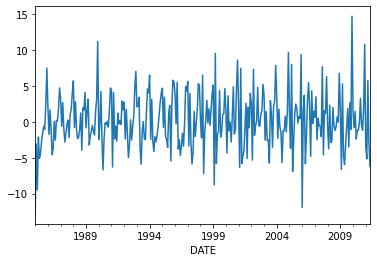

In [57]:
df_train['Res_WATT'].plot()
plt.show()

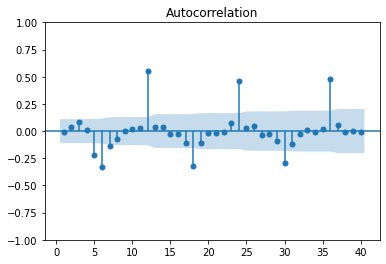

In [58]:
plot_acf(df_train['Res_WATT'], lags=40, zero=False)
plt.show()

In [59]:
df_train['Res_WATT'] = res_model_8.resid

In [60]:
df_train['Res_WATT'].mean()

0.1336984216214386

In [61]:
df_train['Res_WATT'].var()

14.07659217283475

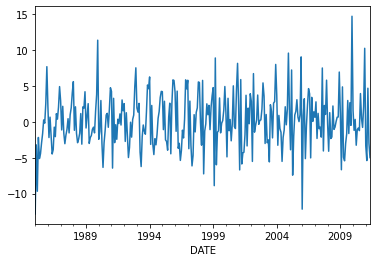

In [62]:
df_train['Res_WATT'].plot()
plt.show()

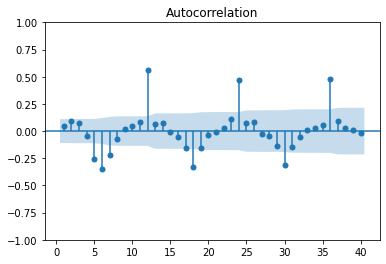

In [63]:
plot_acf(df_train['Res_WATT'], lags=40, zero=False)
plt.show()

In [64]:
df_train['Res_WATT'] = res_model_13.resid

In [65]:
df_train['Res_WATT'].mean()

0.3847293209266994

In [66]:
df_train['Res_WATT'].var()

6.970002623105895

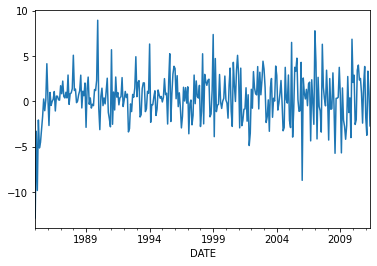

In [67]:
df_train['Res_WATT'].plot()
plt.show()

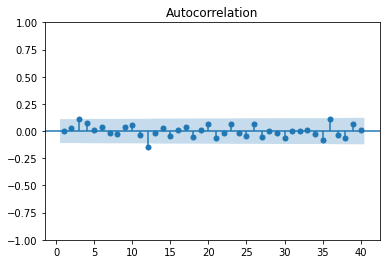

In [68]:
plot_acf(df_train['Res_WATT'], lags=40, zero=False)
plt.show()

In [69]:
df_train['Ret_WATT'] = df_train['WATT'].pct_change(1).mul(100)

In [70]:
adfuller(df_train['Ret_WATT'].iloc[1:])

(-5.949740601572993,
 2.1613774605766873e-07,
 13,
 302,
 {'1%': -3.4521902441030963,
  '5%': -2.871158406898617,
  '10%': -2.5718948388228586},
 1461.7034782771798)

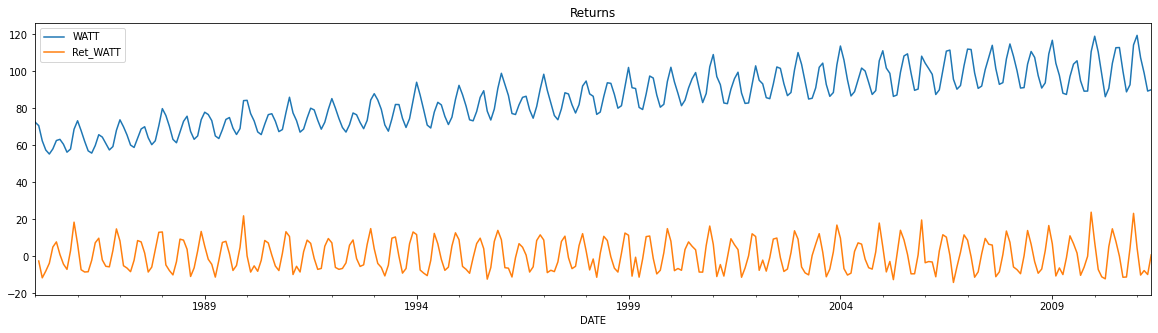

In [71]:
plt.figure(figsize=(20, 5))
df_train['WATT'].plot(title='EB Consume')
df_train['Ret_WATT'].iloc[1:].plot(title='Returns')
plt.legend()
plt.show()

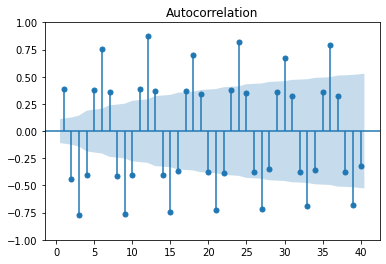

In [72]:
plot_acf(df_train['Ret_WATT'].iloc[1:], lags=40, zero=False)
plt.show()

In [73]:
model_ret_ar_1 = ARIMA(df_train['Ret_WATT'].iloc[1:], order=(1,0,0))
res_ret_ar_1 = model_ret_ar_1.fit()
res_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  316
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1092.490
Date:                Fri, 20 Jan 2023   AIC                           2190.979
Time:                        04:19:28   BIC                           2202.247
Sample:                    02-01-1985   HQIC                          2195.481
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4060      0.738      0.550      0.582      -1.041       1.853
ar.L1          0.3818      0.071      5.377      0.000       0.243       0.521
sigma2        58.9140      5.653     10.421      0.000      47.834      69.994
===================================================================================
Ljung-Box (L1) (Q):                  21.96   Jarque-Bera (JB):                 7.77
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.46   Skew:                             0.28
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
model_ret_ar_2 = ARIMA(df_train['Ret_WATT'], order=(2,0,0))
res_ret_ar_2 = model_ret_ar_2.fit()
res_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  317
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -991.597
Date:                Fri, 20 Jan 2023   AIC                           1991.194
Time:                        04:19:28   BIC                           2006.229
Sample:                    01-01-1985   HQIC                          1997.200
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4545      0.320      1.421      0.155      -0.172       1.081
ar.L1          0.6453      0.041     15.633      0.000       0.564       0.726
ar.L2         -0.6885      0.041    -16.731      0.000      -0.769      -0.608
sigma2        30.9899      2.143     14.460      0.000      26.789      35.190
===================================================================================
Ljung-Box (L1) (Q):                  40.64   Jarque-Bera (JB):                20.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                            -0.41
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
model_ret_ar_3 = ARIMA(df_train['Ret_WATT'], order=(3,0,0))
res_ret_ar_3 = model_ret_ar_3.fit()
res_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  317
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -941.381
Date:                Fri, 20 Jan 2023   AIC                           1892.762
Time:                        04:19:28   BIC                           1911.556
Sample:                    01-01-1985   HQIC                          1900.269
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4669      0.178      2.621      0.009       0.118       0.816
ar.L1          0.2858      0.045      6.284      0.000       0.197       0.375
ar.L2         -0.3525      0.045     -7.918      0.000      -0.440      -0.265
ar.L3         -0.5225      0.043    -12.046      0.000      -0.608      -0.437
sigma2        22.4795      1.633     13.764      0.000      19.278      25.681
===================================================================================
Ljung-Box (L1) (Q):                  17.33   Jarque-Bera (JB):                 3.80
Prob(Q):                              0.00   Prob(JB):                         0.15
Heteroskedasticity (H):               1.37   Skew:                             0.02
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
model_ret_ar_4 = ARIMA(df_train['Ret_WATT'], order=(4,0,0))
res_ret_model_4 = model_ret_ar_4.fit()
res_ret_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  317
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -904.754
Date:                Fri, 20 Jan 2023   AIC                           1821.509
Time:                        04:19:29   BIC                           1844.062
Sample:                    01-01-1985   HQIC                          1830.518
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4828      0.112      4.301      0.000       0.263       0.703
ar.L1          0.0438      0.047      0.936      0.349      -0.048       0.135
ar.L2         -0.5174      0.054     -9.661      0.000      -0.622      -0.412
ar.L3         -0.3942      0.048     -8.162      0.000      -0.489      -0.300
ar.L4         -0.4612      0.057     -8.052      0.000      -0.573      -0.349
sigma2        17.7722      1.267     14.023      0.000      15.288      20.256
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                27.32
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.54
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
model_ret_ar_5 = ARIMA(df_train['Ret_WATT'].iloc[1:], order=(5,0,0))
res_ret_model_5 = model_ret_ar_5.fit()
res_ret_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  316
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -904.514
Date:                Fri, 20 Jan 2023   AIC                           1823.028
Time:                        04:19:29   BIC                           1849.318
Sample:                    02-01-1985   HQIC                          1833.531
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4841      0.111      4.359      0.000       0.266       0.702
ar.L1          0.0255      0.055      0.465      0.642      -0.082       0.133
ar.L2         -0.5334      0.062     -8.609      0.000      -0.655      -0.412
ar.L3         -0.4147      0.062     -6.697      0.000      -0.536      -0.293
ar.L4         -0.4601      0.057     -8.076      0.000      -0.572      -0.348
ar.L5         -0.0397      0.070     -0.570      0.568      -0.176       0.097
sigma2        17.7462      1.297     13.686      0.000      15.205      20.288
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                28.01
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.56
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
model_ret_ar_6 = ARIMA(df_train['Ret_WATT'].iloc[1:], order=(6,0,0))
res_ret_model_6 = model_ret_ar_6.fit()
res_ret_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  316
Model:                 ARIMA(6, 0, 0)   Log Likelihood                -902.359
Date:                Fri, 20 Jan 2023   AIC                           1820.718
Time:                        04:19:31   BIC                           1850.764
Sample:                    02-01-1985   HQIC                          1832.721
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4809      0.128      3.766      0.000       0.231       0.731
ar.L1          0.0297      0.055      0.539      0.590      -0.078       0.138
ar.L2         -0.4795      0.069     -6.931      0.000      -0.615      -0.344
ar.L3         -0.3639      0.075     -4.871      0.000      -0.510      -0.217
ar.L4         -0.3978      0.072     -5.518      0.000      -0.539      -0.257
ar.L5         -0.0411      0.070     -0.583      0.560      -0.179       0.097
ar.L6          0.1193      0.078      1.531      0.126      -0.033       0.272
sigma2        17.4997      1.286     13.603      0.000      14.978      20.021
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.91
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.50
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
model_ret_ar_7 = ARIMA(df_train['Ret_WATT'].iloc[1:], order=(7,0,0))
res_ret_model_7 = model_ret_ar_7.fit()
res_ret_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  316
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -901.760
Date:                Fri, 20 Jan 2023   AIC                           1821.521
Time:                        04:19:32   BIC                           1855.322
Sample:                    02-01-1985   HQIC                          1835.024
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4784      0.139      3.447      0.001       0.206       0.750
ar.L1          0.0227      0.055      0.415      0.678      -0.085       0.130
ar.L2         -0.4767      0.069     -6.923      0.000      -0.612      -0.342
ar.L3         -0.3392      0.078     -4.336      0.000      -0.492      -0.186
ar.L4         -0.3736      0.077     -4.839      0.000      -0.525      -0.222
ar.L5         -0.0112      0.078     -0.144      0.886      -0.164       0.142
ar.L6          0.1182      0.079      1.503      0.133      -0.036       0.272
ar.L7          0.0630      0.072      0.871      0.384      -0.079       0.205
sigma2        17.4311      1.290     13.513      0.000      14.903      19.959
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                25.23
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.50
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
model_ret_ar_8 = ARIMA(df_train['Ret_WATT'].iloc[1:], order=(8,0,0))
res_ret_model_8 = model_ret_ar_8.fit()
res_ret_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  316
Model:                 ARIMA(8, 0, 0)   Log Likelihood                -891.077
Date:                Fri, 20 Jan 2023   AIC                           1802.153
Time:                        04:19:33   BIC                           1839.711
Sample:                    02-01-1985   HQIC                          1817.157
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4880      0.103      4.752      0.000       0.287       0.689
ar.L1          0.0381      0.054      0.712      0.477      -0.067       0.143
ar.L2         -0.4487      0.066     -6.802      0.000      -0.578      -0.319
ar.L3         -0.3425      0.074     -4.657      0.000      -0.487      -0.198
ar.L4         -0.4708      0.077     -6.093      0.000      -0.622      -0.319
ar.L5         -0.1058      0.079     -1.336      0.182      -0.261       0.049
ar.L6         -0.0037      0.082     -0.046      0.963      -0.164       0.156
ar.L7          0.0655      0.065      1.002      0.316      -0.063       0.194
ar.L8         -0.2616      0.070     -3.750      0.000      -0.398      -0.125
sigma2        16.2613      1.289     12.614      0.000      13.735      18.788
===================================================================================
Ljung-Box (L1) (Q):                   2.14   Jarque-Bera (JB):                22.32
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.52
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
model_ret_ar_9 = ARIMA(df_train['Ret_WATT'].iloc[1:], order=(9,0,0))
res_ret_model_9 = model_ret_ar_9.fit()
res_ret_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  316
Model:                 ARIMA(9, 0, 0)   Log Likelihood                -872.583
Date:                Fri, 20 Jan 2023   AIC                           1767.166
Time:                        04:19:36   BIC                           1808.479
Sample:                    02-01-1985   HQIC                          1783.670
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4957      0.074      6.686      0.000       0.350       0.641
ar.L1         -0.0503      0.054     -0.937      0.349      -0.155       0.055
ar.L2         -0.4284      0.062     -6.874      0.000      -0.551      -0.306
ar.L3         -0.3485      0.069     -5.055      0.000      -0.484      -0.213
ar.L4         -0.5063      0.076     -6.623      0.000      -0.656      -0.356
ar.L5         -0.2660      0.081     -3.274      0.001      -0.425      -0.107
ar.L6         -0.1283      0.078     -1.649      0.099      -0.281       0.024
ar.L7         -0.0831      0.069     -1.198      0.231      -0.219       0.053
ar.L8         -0.2529      0.069     -3.677      0.000      -0.388      -0.118
ar.L9         -0.3396      0.061     -5.533      0.000      -0.460      -0.219
sigma2        14.4131      1.108     13.008      0.000      12.241      16.585
===================================================================================
Ljung-Box (L1) (Q):                   9.83   Jarque-Bera (JB):                52.33
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.67
Prob(H) (two-sided):                  0.35   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
model_ret_ar_10 = ARIMA(df_train['Ret_WATT'].iloc[1:], order=(10,0,0))
res_ret_model_10 = model_ret_ar_10.fit()
res_ret_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  316
Model:                ARIMA(10, 0, 0)   Log Likelihood                -817.687
Date:                Fri, 20 Jan 2023   AIC                           1659.374
Time:                        04:19:39   BIC                           1704.443
Sample:                    02-01-1985   HQIC                          1677.379
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5002      0.039     12.792      0.000       0.424       0.577
ar.L1         -0.2336      0.044     -5.305      0.000      -0.320      -0.147
ar.L2         -0.5642      0.049    -11.490      0.000      -0.660      -0.468
ar.L3         -0.3989      0.056     -7.133      0.000      -0.509      -0.289
ar.L4         -0.5778      0.066     -8.732      0.000      -0.708      -0.448
ar.L5         -0.4088      0.069     -5.893      0.000      -0.545      -0.273
ar.L6         -0.4109      0.069     -5.985      0.000      -0.546      -0.276
ar.L7         -0.2861      0.057     -4.989      0.000      -0.398      -0.174
ar.L8         -0.4813      0.058     -8.275      0.000      -0.595      -0.367
ar.L9         -0.3732      0.047     -7.941      0.000      -0.465      -0.281
ar.L10        -0.5523      0.044    -12.609      0.000      -0.638      -0.466
sigma2        10.0603      0.736     13.673      0.000       8.618      11.502
===================================================================================
Ljung-Box (L1) (Q):                  15.75   Jarque-Bera (JB):                13.64
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.27
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
model_ret_ar_11 = ARIMA(df_train['Ret_WATT'].iloc[1:], order=(11,0,0))
res_ret_model_11 = model_ret_ar_11.fit()
res_ret_model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  316
Model:                ARIMA(11, 0, 0)   Log Likelihood                -787.140
Date:                Fri, 20 Jan 2023   AIC                           1600.279
Time:                        04:19:43   BIC                           1649.104
Sample:                    02-01-1985   HQIC                          1619.785
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5010      0.024     20.900      0.000       0.454       0.548
ar.L1         -0.4667      0.048     -9.661      0.000      -0.561      -0.372
ar.L2         -0.7132      0.048    -14.846      0.000      -0.807      -0.619
ar.L3         -0.6033      0.057    -10.533      0.000      -0.716      -0.491
ar.L4         -0.6952      0.057    -12.232      0.000      -0.807      -0.584
ar.L5         -0.5798      0.064     -9.093      0.000      -0.705      -0.455
ar.L6         -0.5807      0.065     -8.867      0.000      -0.709      -0.452
ar.L7         -0.5336      0.061     -8.756      0.000      -0.653      -0.414
ar.L8         -0.6576      0.054    -12.267      0.000      -0.763      -0.553
ar.L9         -0.6102      0.051    -11.864      0.000      -0.711      -0.509
ar.L10        -0.6553      0.043    -15.122      0.000      -0.740      -0.570
ar.L11        -0.4306      0.054     -7.909      0.000      -0.537      -0.324
sigma2         8.2804      0.596     13.902      0.000       7.113       9.448
===================================================================================
Ljung-Box (L1) (Q):                   7.41   Jarque-Bera (JB):                 9.65
Prob(Q):                              0.01   Prob(JB):                         0.01
Heteroskedasticity (H):               1.33   Skew:                             0.16
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
model_ret_ar_12 = ARIMA(df_train['Ret_WATT'].iloc[1:], order=(12,0,0))
res_ret_model_12 = model_ret_ar_12.fit()
res_ret_model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  316
Model:                ARIMA(12, 0, 0)   Log Likelihood                -765.930
Date:                Fri, 20 Jan 2023   AIC                           1559.861
Time:                        04:19:48   BIC                           1612.441
Sample:                    02-01-1985   HQIC                          1580.866
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5023      0.034     14.763      0.000       0.436       0.569
ar.L1         -0.3051      0.050     -6.110      0.000      -0.403      -0.207
ar.L2         -0.4699      0.053     -8.794      0.000      -0.575      -0.365
ar.L3         -0.3858      0.061     -6.299      0.000      -0.506      -0.266
ar.L4         -0.4580      0.062     -7.432      0.000      -0.579      -0.337
ar.L5         -0.3894      0.065     -6.032      0.000      -0.516      -0.263
ar.L6         -0.3667      0.066     -5.540      0.000      -0.496      -0.237
ar.L7         -0.3266      0.062     -5.304      0.000      -0.447      -0.206
ar.L8         -0.4085      0.062     -6.638      0.000      -0.529      -0.288
ar.L9         -0.3840      0.053     -7.179      0.000      -0.489      -0.279
ar.L10        -0.3960      0.054     -7.377      0.000      -0.501      -0.291
ar.L11        -0.2538      0.052     -4.895      0.000      -0.355      -0.152
ar.L12         0.3682      0.047      7.770      0.000       0.275       0.461
sigma2         7.0313      0.501     14.027      0.000       6.049       8.014
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 8.35
Prob(Q):                              0.63   Prob(JB):                         0.02
Heteroskedasticity (H):               1.38   Skew:                             0.19
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
model_ret_ar_13 = ARIMA(df_train['Ret_WATT'].iloc[1:], order=(13,0,0))
res_ret_model_13 = model_ret_ar_13.fit()
res_ret_model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ret_WATT   No. Observations:                  316
Model:                ARIMA(13, 0, 0)   Log Likelihood                -768.151
Date:                Fri, 20 Jan 2023   AIC                           1566.301
Time:                        04:19:53   BIC                           1622.637
Sample:                    02-01-1985   HQIC                          1588.807
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5009      0.036     13.899      0.000       0.430       0.571
ar.L1         -0.3280      0.053     -6.220      0.000      -0.431      -0.225
ar.L2         -0.4643      0.057     -8.148      0.000      -0.576      -0.353
ar.L3         -0.3658      0.070     -5.239      0.000      -0.503      -0.229
ar.L4         -0.4359      0.071     -6.101      0.000      -0.576      -0.296
ar.L5         -0.3647      0.072     -5.076      0.000      -0.506      -0.224
ar.L6         -0.3496      0.074     -4.729      0.000      -0.494      -0.205
ar.L7         -0.3013      0.068     -4.436      0.000      -0.434      -0.168
ar.L8         -0.3782      0.071     -5.321      0.000      -0.518      -0.239
ar.L9         -0.3557      0.064     -5.546      0.000      -0.481      -0.230
ar.L10        -0.3760      0.060     -6.291      0.000      -0.493      -0.259
ar.L11        -0.2237      0.064     -3.519      0.000      -0.348      -0.099
ar.L12         0.3845      0.054      7.132      0.000       0.279       0.490
ar.L13         0.0591      0.060      0.986      0.324      -0.058       0.177
sigma2         7.0761      0.508     13.941      0.000       6.081       8.071
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 9.21
Prob(Q):                              0.82   Prob(JB):                         0.01
Heteroskedasticity (H):               1.38   Skew:                             0.20
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [87]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

In [88]:
LLR_test(model_ret_ar_3, model_ret_ar_4)

0.0

In [89]:
LLR_test(model_ret_ar_4, model_ret_ar_5)

0.488

In [90]:
LLR_test(model_ret_ar_5, model_ret_ar_6)

0.038

In [91]:
LLR_test(model_ret_ar_6, model_ret_ar_7)

0.274

In [92]:
LLR_test(model_ret_ar_7, model_ret_ar_8)

0.0

In [93]:
LLR_test(model_ret_ar_8, model_ret_ar_9)

0.0

In [94]:
LLR_test(model_ret_ar_9, model_ret_ar_10)

0.0

In [95]:
LLR_test(model_ret_ar_10, model_ret_ar_11)

0.0

In [96]:
LLR_test(model_ret_ar_11, model_ret_ar_12)

0.0

In [97]:
LLR_test(model_ret_ar_12, model_ret_ar_13)

1.0

In [98]:
LLR_test(model_ret_ar_4, model_ret_ar_6, DF=2)

0.091

In [99]:
LLR_test(model_ret_ar_4, model_ret_ar_8, DF=4)

0.0

In [100]:
LLR_test(model_ret_ar_4, model_ret_ar_12, DF=8)

0.0

In [101]:
LLR_test(model_ret_ar_8, model_ret_ar_12, DF=4)

0.0

In [102]:
df_train['Res_Ret_WATT'] = res_ret_model_4.resid

In [103]:
df_train['Res_Ret_WATT'].mean()

-0.05791992236390741

In [104]:
df_train['Res_Ret_WATT'].var()

18.165051872922565

In [105]:
adfuller(df_train['Res_Ret_WATT'].iloc[1:])

(-5.9546484964580175,
 2.1072669480620623e-07,
 15,
 300,
 {'1%': -3.4523371197407404,
  '5%': -2.871222860740741,
  '10%': -2.571929211111111},
 1501.2321764034027)

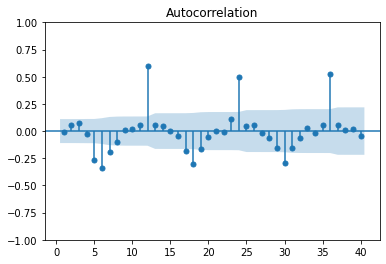

In [106]:
plot_acf(df_train['Res_Ret_WATT'].iloc[1:], lags=40, zero=False)
plt.show()

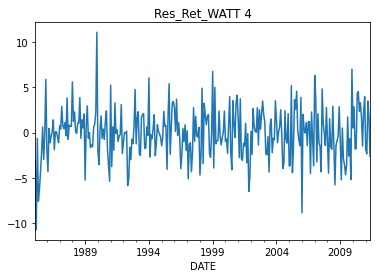

In [172]:
df_train['Res_Ret_WATT'].iloc[1:].plot()
plt.title('Res_Ret_WATT 4')
plt.show()

In [108]:
df_train['Res_Ret_WATT'] = res_ret_model_8.resid

In [109]:
df_train['Res_Ret_WATT'].mean()

-0.06747208821899907

In [110]:
df_train['Res_Ret_WATT'].var()

16.691637101936752

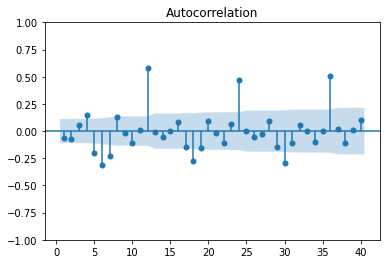

In [111]:
plot_acf(df_train['Res_Ret_WATT'].iloc[1:], lags=40, zero=False)
plt.show()

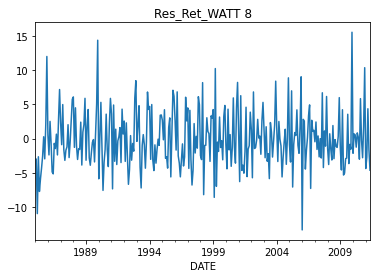

In [112]:
df_train['Res_Ret_WATT'].plot()
plt.title('Res_Ret_WATT 8')
plt.show()

In [175]:
df_train['Res_Ret_WATT'] = res_ret_model_12.resid
res_ret_model_12.resid

DATE
1985-02-01    -3.030643
1985-03-01   -10.741331
1985-04-01    -0.646506
1985-05-01    -7.577800
1985-06-01    -6.238135
                ...    
2011-01-01    -1.900621
2011-02-01    -2.342644
2011-03-01     3.490582
2011-04-01     1.778848
2011-05-01    -2.627022
Length: 316, dtype: float64

In [114]:
df_train['Res_Ret_WATT'].mean()

-0.10914777884898041

In [115]:
df_train['Res_Ret_WATT'].var()

7.801792270131413

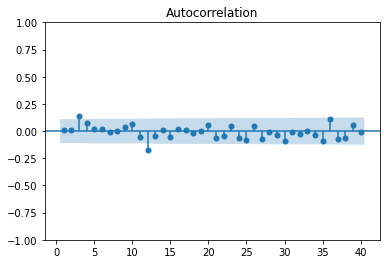

In [116]:
plot_acf(df_train['Res_Ret_WATT'].iloc[1:], lags=40, zero=False)
plt.show()

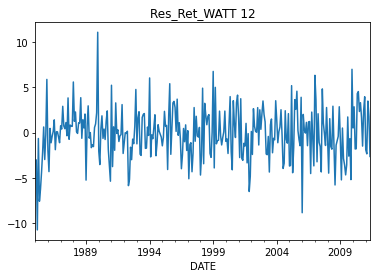

In [121]:
df_train['Res_Ret_WATT'].plot()
plt.title('Res_Ret_WATT 12')
plt.show()

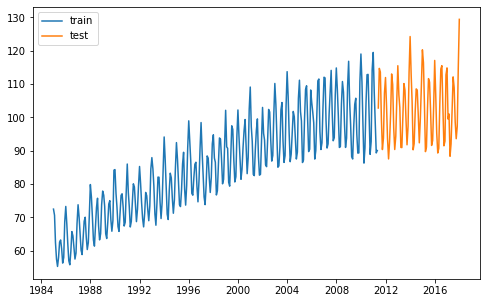

In [125]:
plt.figure(figsize=(8, 5))
plt.plot(df_train['WATT'])
plt.plot(df_test['WATT'])
plt.legend(['train', 'test'])
plt.show()

In [126]:
from sklearn.metrics import r2_score

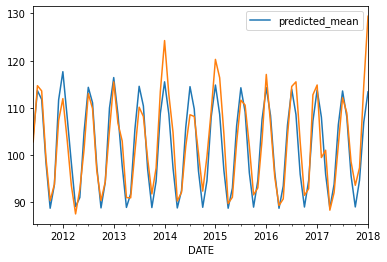

In [167]:
res_model_13_pred = pd.DataFrame(res_model_13.predict(start=df_test.index[0], end=df_test.index[len(df_test)-1]), index=df_test.index)
res_model_13_pred.plot()
df_test['WATT'].plot()
plt.show()

In [169]:
df_test['ar_model_13_pred'] = res_model_13_pred
r2_score(df_test['WATT'], df_test['ar_model_13_pred'])

0.8065318198365783

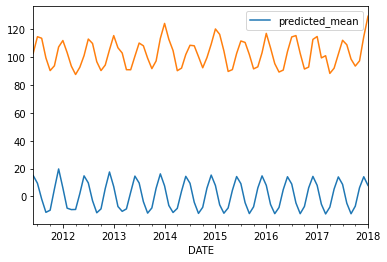

In [170]:
res_ret_model_12_pred = pd.DataFrame(res_ret_model_12.predict(start=df_test.index[0], end=df_test.index[len(df_test)-1]), index=df_test.index)
res_ret_model_12_pred.plot()
df_test['WATT'].plot()
plt.show()

In [171]:
df_test['res_ret_model_12_pred'] = res_ret_model_12_pred
r2_score(df_test['WATT'], df_test['res_ret_model_12_pred'])

-113.72893574824313